In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
features = pd.read_pickle('Liar-Liar-FS-nodup.pkl')
features.fillna(0,inplace=True)

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10223 entries, 0 to 10222
Data columns (total 28 columns):
TF                                      10223 non-null float64
Bigram TF                               10223 non-null float64
No. of Stop_words                       10223 non-null float64
Out of Context                          10223 non-null float64
Arts, Culture, Entertainment, Sports    10223 non-null float64
Conspiracy                              10223 non-null float64
Business and Industrial                 10223 non-null float64
economy, business and finance           10223 non-null float64
Religion and belief                     10223 non-null float64
Law, Government and Politics            10223 non-null float64
Education                               10223 non-null float64
Technology and Computing                10223 non-null float64
Science                                 10223 non-null float64
Sixltr                                  10223 non-null float64
conj     

In [4]:
df= pd.read_pickle('Liar-Liar-dup.pkl')
list(df.columns)

['Statement ID',
 'Label',
 'Statement',
 'Subject(s)',
 'Speaker',
 'Speakers Job Title',
 'State Info.',
 'Party Affiliation',
 'Barely True Counts',
 'False Counts',
 'Half True Counts',
 'Mostly True Counts',
 'Pants on fire counts',
 'Context',
 'Grammatical errors',
 'pos_tag',
 'clean_text',
 'TF',
 'TF_final',
 'out_of_context_terms',
 'out_context_final',
 'Textrazor_category',
 'Textrazor_topic',
 'Topics_category',
 'Topics_topic',
 'score_category',
 'score_topic',
 'category_score_final',
 'category_list_final',
 'topic_score_final',
 'topic_list_final',
 'formula 1',
 'formula 2',
 'bigram TF',
 'bigram TF final',
 'No. of stop_words',
 'arts, culture and entertainment',
 'Conspiracy',
 'crime, law and justice',
 'Criticism of journalism',
 'Advertising video on demand',
 'computing and information technology',
 'agriculture',
 'energy and resource',
 'economy, business and finance',
 'Harassment',
 'Cyberspace',
 'religion and belief',
 'Politics and technology',
 'Socia

In [5]:
print(len(df))
print(len(features))

10223
10223


In [6]:
X=features.loc[:,['TF','Bigram TF','No. of Stop_words', 'Out of Context', 'Religion and belief', 'Law, Government and Politics',
 'Sixltr', 'conj', 'interrog', 'number', 'negemo', 'social', 'certain', 'percept', 'focuspast', 'focuspresent', 'time','PERSON','ORG','TIME','GPE']]

In [7]:
X=X.iloc[:,:].values

In [8]:
#creating the dependant variable y
y= df.loc[:,['Label']]

In [9]:
y[1:50]

,Label
1,half-true
2,mostly-true
3,FALSE
4,half-true
5,TRUE
6,barely-true
7,half-true
8,half-true
9,mostly-true
10,mostly-true


In [10]:
print(type(y))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [11]:
#mapping the labels to respective numeric terms
dict = {'FALSE' : 0, 'TRUE' : 1, 'pants-fire' : 0, 'half-true': 1, 'mostly-true':1, 'barely-true': 0}

In [12]:
y=y.replace({"Label": dict})

In [13]:
y=y.iloc[:,0].values

In [14]:
print(type(y))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# #splitting our data into train and test, 20% test and 80% train
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [17]:
#Stratified split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit( n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [5177 1948 2554 ... 7111 5459 8651] TEST: [7189 5853    7 ...  605 4668 6113]
TRAIN: [5924 5122 4571 ... 3416 9481 2812] TEST: [1565 5779  956 ... 8054  928 6244]
TRAIN: [4101  808 8671 ... 9344 2910 8826] TEST: [7331 7635 6266 ... 1453 1288 5482]
TRAIN: [9876 9126 6702 ... 4296 2213 1714] TEST: [4781 4857 3324 ... 6043 7213 7931]
TRAIN: [6778 1739 2857 ... 1982 8639 2211] TEST: [9613  611 7518 ... 3480 8695 4391]


In [18]:
print(len(X_train))

8178


In [19]:
#Applying feature scaling so that training is faster
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# #Applying LDA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components = 5)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

Confusion matrix with Naive Bayes: 
[[164 732]
 [211 938]]
Accuracy with Naive Bayes: 
0.5388753056234719
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.5597932683531196
0.01323190530607597


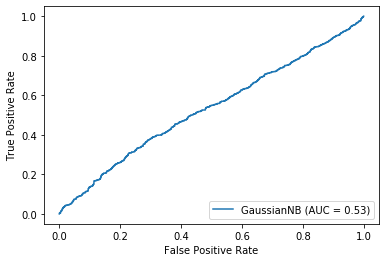

In [21]:
#classifier naive bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


print("Confusion matrix with Naive Bayes: ")
print(cm)
print("Accuracy with Naive Bayes: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

from sklearn import  metrics
naive_bayes = metrics.plot_roc_curve(classifier, X_test, y_test)


Confusion matrix with random forests: 
[[352 544]
 [325 824]]
Accuracy with random forests: 
0.5750611246943765
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.574341843407062
0.013581934149969756
Accuracy with Grid search :
0.574341843407062
Best parameters for random forests for best accuracy
{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100, 'random_state': 0}


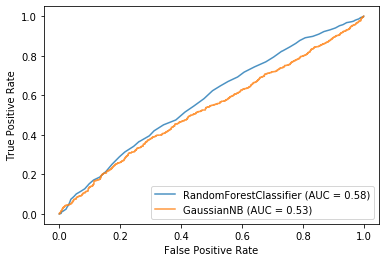

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0, max_features='auto')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with random forests: ")
print(cm)
print("Accuracy with random forests: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [ 110, 90, 100], 'criterion': ['entropy', 'gini'], 'random_state':[0], 'max_features':['auto',  None ]}
             ]
    
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Accuracy with Grid search :")
print(best_accuracy)

print("Best parameters for random forests for best accuracy")
print(best_parameters)

from sklearn import  metrics
ax=plt.gca()
random_forests = metrics.plot_roc_curve(classifier, X_test, y_test, ax=ax, alpha=0.8)
naive_bayes.plot(ax=ax, alpha=0.8)
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_features='auto')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with decision tree: ")
print(cm)
print("Accuracy with decision tree: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())


# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{ 'criterion': ['entropy', 'gini'], 'random_state':[0,42], 'max_features':['auto',  None ]}
             ]
    
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Accuracy with Grid search :")
print(best_accuracy)

print("Best parameters for random forests for best accuracy")
print(best_parameters)

from sklearn import  metrics
decision_tree = metrics.plot_roc_curve(classifier, X_test, y_test,ax=ax, alpha=0.8)

Confusion matrix with decision tree: 
[[420 476]
 [493 656]]
Accuracy with decision tree: 
0.526161369193154
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.5265321574248922
0.013220214566903183
Accuracy with Grid search :
0.5304486268266333
Best parameters for random forests for best accuracy
{'criterion': 'gini', 'max_features': 'auto', 'random_state': 42}


In [24]:
classifier.feature_importances_

array([0.02192365, 0.00207535, 0.10842067, 0.11751995, 0.00828228,
       0.0661158 , 0.10782462, 0.04805206, 0.01741337, 0.0663088 ,
       0.03307393, 0.07328103, 0.02632045, 0.04884428, 0.06139178,
       0.09023276, 0.04704322, 0.01878958, 0.00855726, 0.00209416,
       0.026435  ])

Confusion matrix with K Nearest Neighbours: 
[[246 650]
 [225 924]]
Accuracy with K nearest Neighbours: 
0.5721271393643031
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.5838778942580196
0.014189788808478366


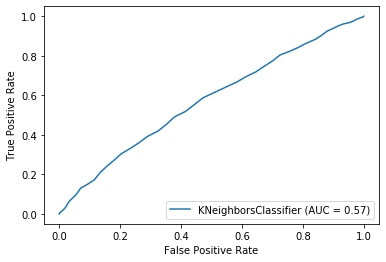

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 130, p = 1, algorithm='auto')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with K Nearest Neighbours: ")
print(cm)
print("Accuracy with K nearest Neighbours: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

# # Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [{'n_neighbors': [ 140, 130, 135], 'p':[1,2], "algorithm":['auto'] }]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

# print("Accuracy with Grid search :")
# print(best_accuracy)

# print("Best parameters for KNN for best accuracy")
# print(best_parameters)

from sklearn import  metrics
KNN = metrics.plot_roc_curve(classifier, X_test, y_test)


Confusion matrix with XGBoost: 
[[284 612]
 [274 875]]
Accuracy with XGBoost: 
0.5667481662591687
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.5907253563487386
0.013413463775925378


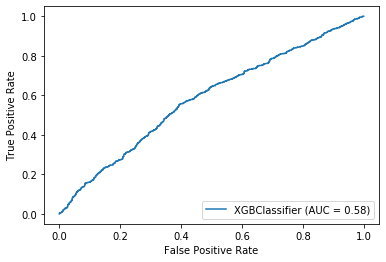

In [26]:
import xgboost
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with XGBoost: ")
print(cm)
print("Accuracy with XGBoost: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

from sklearn import  metrics
XGboost = metrics.plot_roc_curve(classifier, X_test, y_test)


Confusion matrix with kernel SVM: 
[[261 635]
 [239 910]]
Accuracy with kernel SVM: 
0.5726161369193155
Accuracy and Standard deviation after applying k-fold cross validation, k=10
0.5876685231016929
0.014815251446872998


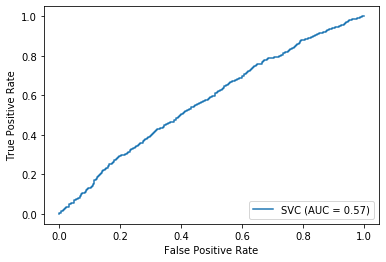

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma='auto', C=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix with kernel SVM: ")
print(cm)
print("Accuracy with kernel SVM: ")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print("Accuracy and Standard deviation after applying k-fold cross validation, k=10")
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

# # Applying Grid Search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [ {'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': ['scale', 'auto']}]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,
#                            n_jobs = -1)
# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

# print("Accuracy with Grid search :")
# print(best_accuracy)

# print("Best parameters for SVM for best accuracy")
# print(best_parameters)

from sklearn import  metrics
svm = metrics.plot_roc_curve(classifier, X_test, y_test)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

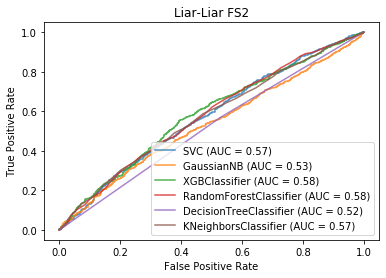

In [29]:
#plotting the graphs
ax=plt.gca()
svm.plot(ax=ax, alpha=0.8)
naive_bayes.plot(ax=ax, alpha=0.8)
XGboost.plot(ax=ax, alpha=0.8)
random_forests.plot(ax=ax, alpha=0.8)
decision_tree.plot(ax=ax, alpha=0.8)
KNN.plot(ax=ax, alpha=0.8)
plt.title('Liar-Liar FS2')
fig = plt.gcf()
fig.savefig('liar-liar-FS2.eps',transparent=True, bbox_inches='tight', dpi=400)
plt.show()

In [28]:
fig = plt.gcf()
fig.savefig('liar-liar-FS1.jpg',transparent=True, bbox_inches='tight', dpi=400)

<Figure size 432x288 with 0 Axes>

In [34]:
plt.show()